In [10]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern, multiblock_lbp
from skimage import data, io,data_dir,filters, feature
from skimage.color import label2rgb
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from numpy.testing import assert_equal
from skimage.transform import integral_image
from skimage import data
from matplotlib import pyplot as plt
from skimage.feature import draw_multiblock_lbp


# 导入原图像

			 原始图像形状:
 			 (750, 748, 3)


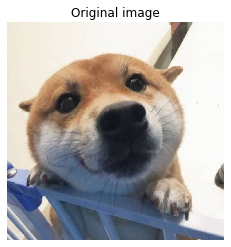

In [69]:
img = cv2.imread(r"C:\Users\iceic\Pictures\2_1_BGR.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h, w = img.shape[0], img.shape[1]
fig1 = plt.figure('原始图像')

plt.imshow(img)
plt.axis('off')
plt.title('Original image')
print( '\t\t\t 原始图像形状:\n', '\t\t\t',img.shape )

# 写划分函数 为后面的分块做准备

In [70]:
def divide_method2(img,m,n):#分割成m行n列
    h, w = img.shape[0],img.shape[1]
    grid_h=int(h*1.0/(m-1)+0.5)#每个网格的高
    grid_w=int(w*1.0/(n-1)+0.5)#每个网格的宽
    
    #满足整除关系时的高、宽
    h=grid_h*(m-1)
    w=grid_w*(n-1)
    
    #图像缩放
    
    img_re=cv2.resize(img,(w,h),cv2.INTER_LINEAR)# 也可以用img_re=skimage.transform.resize(img, (h,w)).astype(np.uint8)
    
    #plt.imshow(img_re)
    
    
    gx, gy = np.meshgrid(np.linspace(0, w, n),np.linspace(0, h, m))
    gx=gx.astype(np.int)
    gy=gy.astype(np.int)

    divide_image = np.zeros([m-1, n-1, grid_h, grid_w,3], np.uint8)#这是一个五维的张量，前面两维表示分块后图像的位置（第m行，第n列），后面三维表示每个分块后的图像信息
    
    for i in range(m-1):
        for j in range(n-1):      
            divide_image[i,j,...]=img_re[
            gy[i][j]:gy[i+1][j+1], gx[i][j]:gx[i+1][j+1],:]
    return divide_image


# 展示分块之后的效果 并保存 为分块LBP做准备

In [80]:
def display_blocks(divide_image):#    
    m,n=divide_image.shape[0],divide_image.shape[1]
    for i in range(m):
        for j in range(n):
            plt.subplot(m,n,i*n+j+1)
            plt.imshow(divide_image[i,j,:])
            plt.axis('off')
            plt.title('block:'+str(i*n+j+1))
            cv2.imwrite(r"C:\Users\iceic\Pictures\new" + str(i*n+j+1) + ".jpg", cv2.cvtColor(divide_image[i,j,:], cv2.COLOR_RGB2BGR))#改变读取颜色的差异
            #cv2.imwrite(r"C:\Users\iceic\Pictures\block" + str(i*n+j+1) + ".jpg", divide_image[i,j,:])


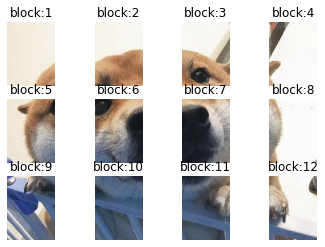

In [81]:
divide_image2=divide_method2(img,m+1,n+1)#该函数中m+1和n+1表示网格点个数，m和n分别表示分块的块数
fig3 = plt.figure('分块后的子图像:图像缩放法')
display_blocks(divide_image2)


# 批量进行LBP

In [89]:
#批量分块进行LBP
for i in range(1,13):
    image = cv2.imread(r"C:\Users\iceic\Pictures\new" + str(i) + ".jpg")
    #显示到plt中，需要从BGR转化到RGB，若是cv2.imshow(win_name, image)，则不需要转化
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(image, n_points, radius)
    cv2.imwrite(r"C:\Users\iceic\Pictures\newLBP" + str(i) + ".jpg", lbp)


#灰度和旋转不变LBP（局部二元模式）

"""
skimage.feature.local_binary_pattern(image, P, R, method=‘default’)
image：灰度图像的像素矩阵
P：选取中心像素周围的像素点的个数
R：选取的区域的半径
"""




'\nskimage.feature.local_binary_pattern(image, P, R, method=‘default’)\nimage：灰度图像的像素矩阵\nP：选取中心像素周围的像素点的个数\nR：选取的区域的半径\n'

## 单张进行LBP的效果图

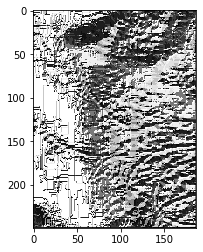

In [100]:
#单张进行LBP
image = cv2.imread(r"C:\Users\iceic\Pictures\new5.jpg")
#显示到plt中，需要从BGR转化到RGB，若是cv2.imshow(win_name, image)，则不需要转化
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
lbp = local_binary_pattern(image, n_points, radius)
plt.subplot(111)
plt.imshow(lbp, plt.cm.gray)

# 进行图片的拼接 为后面的HISTCMP_INTERSECT做准备

In [91]:
#拼接图像的函数
def image_concat(divide_image):
    m,n,grid_h, grid_w=[divide_image.shape[0],divide_image.shape[1],#每行，每列的图像块数
                       divide_image.shape[2],divide_image.shape[3]]#每个图像块的尺寸

    restore_image = np.zeros([m*grid_h, n*grid_w, 3], np.uint8)
    restore_image[0:grid_h,0:]
    for i in range(m):
        for j in range(n):
            restore_image[i*grid_h:(i+1)*grid_h,j*grid_w:(j+1)*grid_w]=divide_image[i,j,:]
    return restore_image


	‘图像缩放法’： (750, 748, 3)


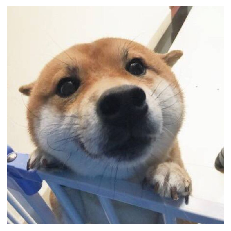

In [188]:
fig4 = plt.figure('分块图像的还原')
#restore_image1=image_concat(divide_image1)#四舍五入法分块还原
restore_image2=image_concat(divide_image2)#图像缩放法分块还原
plt.subplot(1,1,1)
#plt.imshow(restore_image1)
#plt.axis('off')
#plt.title('Rounding')
#plt.subplot(1,2,2)
plt.imshow(restore_image2)
plt.axis('off')
"""plt.title('Scaling')
print('\t\t\t还原后的图像尺寸')
print('\t‘四舍五入法’：', restore_image1.shape,'\t''‘图像缩放法’：', restore_image2.shape)
"""
print('\t‘图像缩放法’：', restore_image2.shape)
plt.show()


# 开始拼接

In [112]:
#进行拼接处理
import PIL.Image as Image
import os
 
IMAGES_PATH = r"C:\Users\iceic\Pictures\pj\\"  # 图片集地址
IMAGES_FORMAT = ['.jpg']  # 图片格式
IMAGE_SIZE = 128  # 每张小图片的大小
IMAGE_ROW = 3  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 4  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = r"C:\Users\iceic\Pictures\pj\LBPPPP.jpg"  # 图片转换后的地址
 
# 获取图片集地址下的所有图片名称
"""image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if
               os.path.splitext(name)[1] == item]"""
image_names = ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg']
# 简单的对于参数的设定和实际图片集的大小进行数量判断
if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    raise ValueError("合成图片的参数和要求的数量不能匹配！")
 
# 定义图像拼接函数
def image_compose():
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE)) #创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE),Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(IMAGE_SAVE_PATH) # 保存新图
image_compose() #调用函数

# 画出处理前后的直方图进行比较

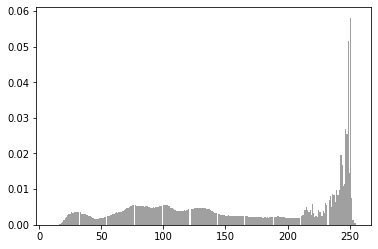

In [167]:
#画出原图的直方图
from PIL import Image

img_zft = np.array(Image.open(r"C:\Users\iceic\Pictures\2_1.jpg").convert('RGB'))

plt.figure("zft")
arr=img_zft.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  
plt.show()

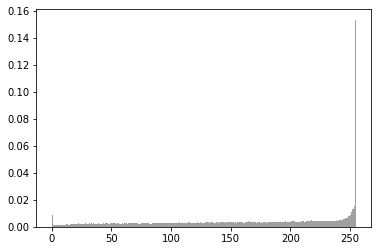

In [184]:
#画出分块LBP之后的直方图
#画出原图的直方图
from PIL import Image

img_zft_LBP = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\LBPPPP.jpg").convert('RGB'))

plt.figure("zft_LBP")
arr=img_zft_LBP.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  
plt.show()

# 通过cv2的库 直接画出直方图并且进行HISTCMP_INTERSECT比较，显然这个方法简单很多

In [187]:
#通过cv2的库 直接画出直方图并且进行HISTCMP_INTERSECT比较

im1 = cv2.imread(r"C:\Users\iceic\Pictures\2_1.jpg",0)
hist1 = cv2.calcHist([im1],[0],None,[256],[0,256])



im2 = cv2.imread(r"C:\Users\iceic\Pictures\pj\LBPPPP.jpg",0)
hist2 = cv2.calcHist([im2],[0],None,[256],[0,256])

a=cv2.compareHist(hist1,hist2,cv2.HISTCMP_INTERSECT)

print (a)

151584.0


# 展示每个块的直方图

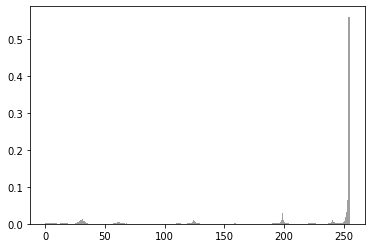

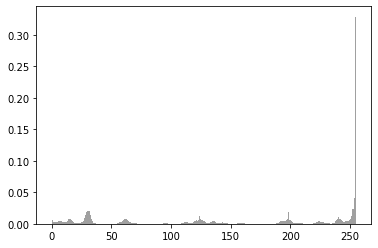

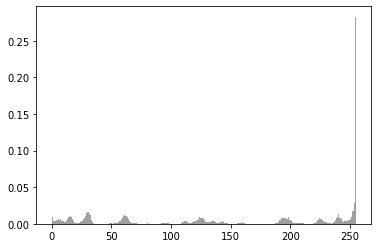

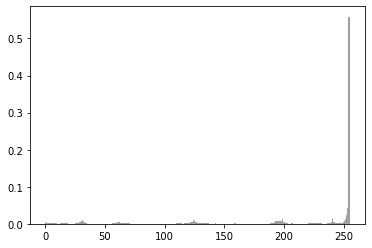

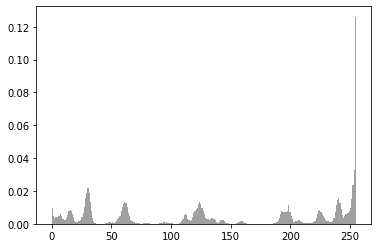

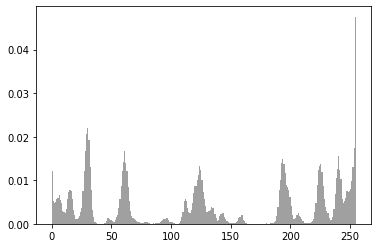

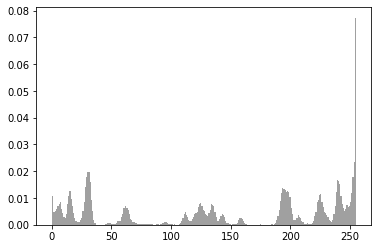

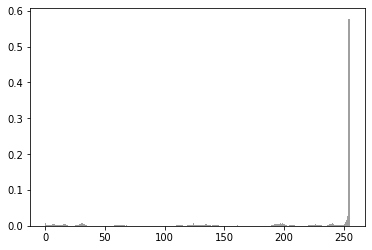

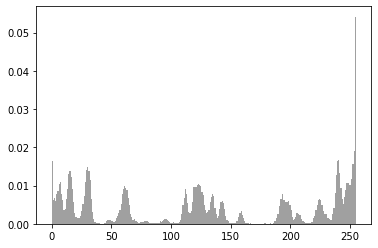

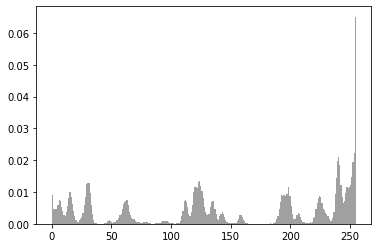

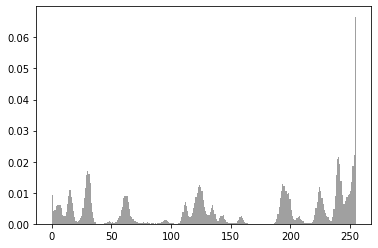

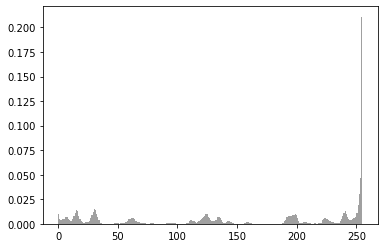

In [183]:
img_zft_LBP_0 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\0.jpg").convert('L'))
plt.figure("zft_LBP_0")
arr=img_zft_LBP_0.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  


img_zft_LBP_1 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\1.jpg").convert('L'))
plt.figure("zft_LBP_1")
arr=img_zft_LBP_1.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  
#plt.show()

img_zft_LBP_2 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\2.jpg").convert('L'))
plt.figure("zft_LBP_2")
arr=img_zft_LBP_2.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_3 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\3.jpg").convert('L'))
plt.figure("zft_LBP_3")
arr=img_zft_LBP_3.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_4 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\4.jpg").convert('L'))
plt.figure("zft_LBP_4")
arr=img_zft_LBP_4.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_5 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\5.jpg").convert('L'))
plt.figure("zft_LBP_5")
arr=img_zft_LBP_5.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_6 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\6.jpg").convert('L'))
plt.figure("zft_LBP_6")
arr=img_zft_LBP_6.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_7 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\7.jpg").convert('L'))
plt.figure("zft_LBP_7")
arr=img_zft_LBP_7.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_8 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\8.jpg").convert('L'))
plt.figure("zft_LBP_8")
arr=img_zft_LBP_8.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_9 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\9.jpg").convert('L'))
plt.figure("zft_LBP_9")
arr=img_zft_LBP_9.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_10 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\10.jpg").convert('L'))
plt.figure("zft_LBP_10")
arr=img_zft_LBP_10.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

img_zft_LBP_11 = np.array(Image.open(r"C:\Users\iceic\Pictures\pj\11.jpg").convert('L'))
plt.figure("zft_LBP_11")
arr=img_zft_LBP_11.flatten()
n, bins, patches = plt.hist(arr, bins=256, density=1, facecolor='gray', alpha=0.75)  

plt.show()

# 进行AVG比较

imgyuanshi: 1556.5924246913578
imgLBP: 503.54108148148134


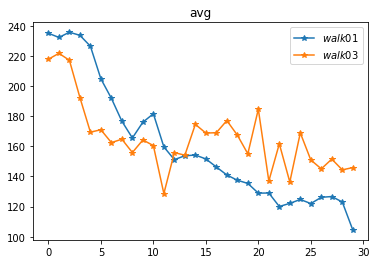

In [117]:
#比较

import cv2
import matplotlib.pyplot as plt 

#计算方差
def getss(list):
    #计算平均值
    avg=sum(list)/len(list)
    #定义方差变量ss，初值为0
    ss=0
    #计算方差
    for l in list:
        ss+=(l-avg)*(l-avg)/len(list)   
    #返回方差
    return ss

#获取每行像素平均值  
def getdiff(img):
    #定义边长
    Sidelength=30
    #缩放图像
    img=cv2.resize(img,(Sidelength,Sidelength),interpolation=cv2.INTER_CUBIC)
    #灰度处理
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #avglist列表保存每行像素平均值
    avglist=[]
    #计算每行均值，保存到avglist列表
    for i in range(Sidelength):
        avg=sum(gray[i])/len(gray[i])
        avglist.append(avg)
    #返回avglist平均值   
    return avglist

#读取测试图片
img1=cv2.imread(r"C:\Users\iceic\Pictures\2_1.jpg")
diff1=getdiff(img1)
print('imgyuanshi:',getss(diff1))

#读取测试图片
img11=cv2.imread(r"C:\Users\iceic\Pictures\pj\LBPPPP.jpg")
diff11=getdiff(img11)
print('imgLBP:',getss(diff11))


x=range(30)  

plt.figure("avg")  
plt.plot(x,diff1,marker="*",label="$walk01$") 
plt.plot(x,diff11,marker="*",label="$walk03$") 
plt.title("avg")
plt.legend()
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()

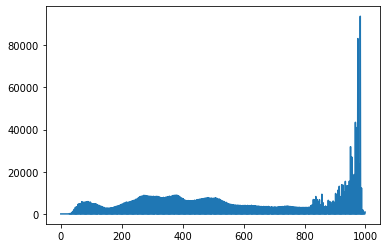

In [150]:
#画出直方图的方法(2)
img1=cv2.imread(r"C:\Users\iceic\Pictures\2_1.jpg")
hist_1, _ = np.histogram(img1, bins=1000)
plt.plot(hist_1)
"""plt.legend()
plt.show()"""


img11=cv2.imread(r"C:\Users\iceic\Pictures\pj\LBPPPP.jpg")
hist_2, _ = np.histogram(img1, bins=1000)
plt.plot(hist_2)